<a href="https://colab.research.google.com/github/pariyamd/Machine-Learning-practice/blob/master/Iris_preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:
import pandas as pd

In [37]:
df = pd.read_csv("iris.data", names=['sepal_length','sepal_width','petal_length','petal_width','target'])

### 1- Missing Values

Q1- using isna()

In [38]:
df.isna().sum(axis=0)

sepal_length    2
sepal_width     0
petal_length    2
petal_width     3
target          3
dtype: int64

Q2- using dropna()

In [39]:
df=df.dropna()

In [40]:
df.isna().sum(axis=0)

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
target          0
dtype: int64

### 2- non-numerical data

Q3- label encoder

In [41]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df["target"]=le.fit_transform(df["target"])
df

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
153,6.7,3.0,5.2,2.3,2
154,6.3,2.5,5.0,1.9,2
155,6.5,3.0,5.2,2.0,2
157,6.2,3.4,5.4,2.3,2


In [42]:
le.inverse_transform([0,1,2])

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

Q4- oneHotEncoder

### 3- Normalization

Q5- StandardScaler

before normalization:

In [43]:
pd.DataFrame({"variance":df.var(),"mean":df.mean()})

,variance,mean
sepal_length,0.685694,5.843333
sepal_width,0.188004,3.054000
petal_length,3.113179,3.758667
petal_width,0.582414,1.198667
target,0.671141,1.000000


In [44]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
df_normalized=df.copy()
df_normalized.loc[:, df_normalized.columns != "target"]=scaler.fit_transform(df_normalized.loc[:, df_normalized.columns != "target"])

In [46]:
pd.DataFrame({"variance":df_normalized.var(),"mean":df_normalized.mean()})

,variance,mean
sepal_length,1.006711,-2.775558e-16
sepal_width,1.006711,-5.140333e-16
petal_length,1.006711,1.154632e-16
petal_width,1.006711,9.251859e-16
target,0.671141,1.000000e+00


### 4- PCA

In [48]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
df_reduced=pd.DataFrame(pca.fit_transform(df_normalized),columns=["V1","V2"])
df_reduced["target"]=list(df_normalized["target"])

In [49]:
df_reduced

,V1,V2,target
0,-2.476965,0.500585,0
1,-2.313886,-0.659120,0
2,-2.567994,-0.324384,0
3,-2.509251,-0.580856,0
4,-2.588980,0.668663,0
...,...,...,...
145,2.118469,0.385062,2
146,1.835538,-0.904895,2
147,1.800721,0.266694,2
148,1.673850,1.014595,2


### 5- Visualization

No handles with labels found to put in legend.


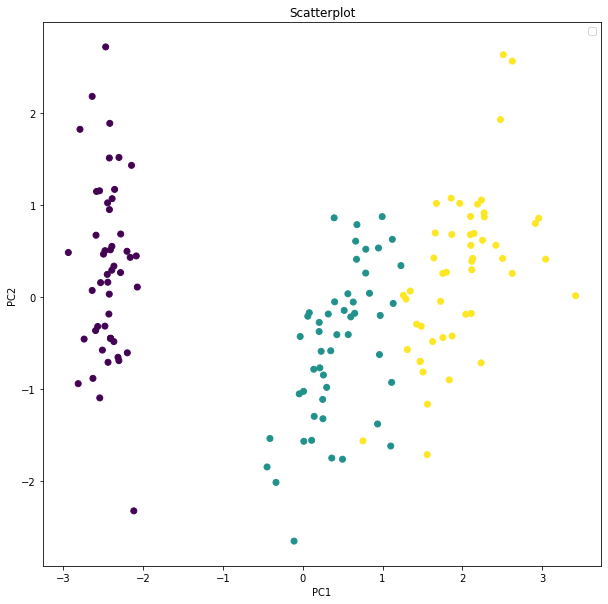

In [55]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.scatter(df_reduced.V1, df_reduced.V2,c=df_reduced.target,)
plt.title('Scatterplot')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()

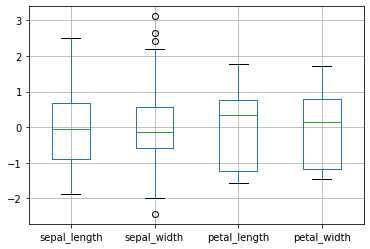

In [62]:
# normalized data
df_normalized.boxplot(column=['sepal_length', 'sepal_width', 'petal_length','petal_width'])

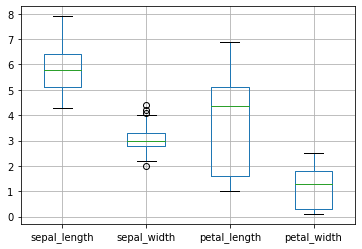

In [63]:
# raw data
df.boxplot(column=['sepal_length', 'sepal_width', 'petal_length','petal_width'])